In [25]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [46]:
player_stats = pd.read_csv("cleaned_NBA_stats.csv")

In [47]:
player_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0,0.0,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14626,Mitchell Robinson,C,24,NYK,59,58,27.0,3.2,4.7,0.671,...,0,0.0,New York Knicks,47.0,35.0,0.573,10.0,116.0,113.1,2.99
14627,Obi Toppin,PF,24,NYK,67,5,15.7,2.8,6.3,0.446,...,0,0.0,New York Knicks,47.0,35.0,0.573,10.0,116.0,113.1,2.99
14628,Quentin Grimes,SG,22,NYK,71,66,29.9,4.0,8.5,0.468,...,0,0.0,New York Knicks,47.0,35.0,0.573,10.0,116.0,113.1,2.99
14629,RJ Barrett,SG,22,NYK,73,73,33.9,7.0,16.1,0.434,...,0,0.0,New York Knicks,47.0,35.0,0.573,10.0,116.0,113.1,2.99


In [30]:
highest_scoring = player_stats[player_stats["G"] > 55].sort_values("PTS", ascending=False).head(10)

<Axes: xlabel='Player'>

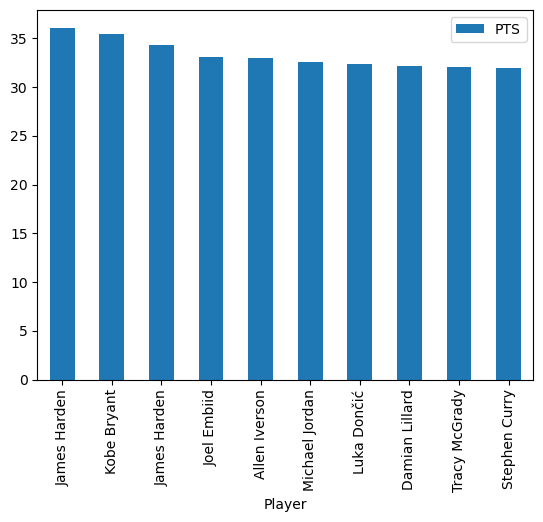

In [49]:
highest_scoring.plot.bar("Player", "PTS")

In [32]:
player_stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won      int64
Pts Max      int64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [33]:
player_stats = player_stats.select_dtypes(include=[np.number])

In [48]:
player_stats.corr()["Share"]

ValueError: could not convert string to float: 'A.C. Green'

In [50]:
player_stats.corr()["Share"].plot.bar()

ValueError: could not convert string to float: 'A.C. Green'

In [51]:
pd.isnull(player_stats).sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [52]:
player_stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [53]:
predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W', 'L', 'W/L%',
       'GB', 'PS/G', 'PA/G', 'SRS']

In [54]:
# Apply the specified filters
filtered_stats = player_stats[((player_stats['G'] > 48) & (player_stats['PTS'] > 13.5) &
                               (player_stats['MP'] > 30) & (player_stats['AST'] > 1) &
                               (player_stats['TRB'] > 3) & (player_stats['FG%'] > 0.37) &
                               (player_stats['FGA'] > 10) & (player_stats['Share'] > 0))].reset_index(drop=True)

In [55]:
filtered_stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,Magic Johnson,PG,31,LAL,79,79,37.1,5.9,12.4,0.477,...,960,0.518,Los Angeles Lakers,58.0,24.0,0.707,5.0,106.3,99.6,6.73
1,Bernard King,SF,34,WSB,64,64,37.5,11.1,23.6,0.472,...,960,0.007,Washington Bullets,30.0,52.0,0.366,26.0,101.4,106.4,-4.84
2,Kevin McHale,PF,33,BOS,68,10,30.4,7.4,13.4,0.553,...,960,0.001,Boston Celtics,56.0,26.0,0.683,0.0,111.5,105.7,5.22
3,Larry Bird,SF,34,BOS,60,60,38.0,7.7,17.0,0.454,...,960,0.026,Boston Celtics,56.0,26.0,0.683,0.0,111.5,105.7,5.22
4,Hakeem Olajuwon,C,28,HOU,56,50,36.8,8.7,17.1,0.508,...,960,0.004,Houston Rockets,52.0,30.0,0.634,3.0,106.7,103.2,3.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,...,1000,0.001,Los Angeles Lakers,43.0,39.0,0.524,5.0,117.2,116.6,0.43
404,Chris Paul,PG,37,PHO,59,59,32.0,5.0,11.3,0.440,...,1000,0.002,Phoenix Suns,45.0,37.0,0.549,3.0,113.6,111.6,2.08
405,Devin Booker,SG,26,PHO,53,53,34.6,9.9,20.1,0.494,...,1000,0.216,Phoenix Suns,45.0,37.0,0.549,3.0,113.6,111.6,2.08
406,Ja Morant,PG,23,MEM,61,59,31.9,9.3,19.9,0.466,...,1000,0.010,Memphis Grizzlies,51.0,31.0,0.622,0.0,116.9,113.0,3.60


In [56]:
# Selecting features and target variable
features = filtered_stats[['G', 'PTS', 'MP', 'AST', 'TRB', 'FG%', 'FGA']]
target = filtered_stats['Share']

In [57]:
# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [58]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test, players_train, players_test = train_test_split(
    features_scaled, target, filtered_stats['Player'], test_size=0.2, random_state=42)

In [59]:
# Training the SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [60]:
# Predicting on the test set
y_pred = svr_model.predict(X_test)

In [63]:
# Calculating model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [65]:
mse

0.06992543691366555

In [66]:
r2

0.14465466264744653

In [64]:
# Displaying the results
predicted_mvp = pd.DataFrame({'Player': players_test, 'Actual Share': y_test, 'Predicted Share': y_pred})
predicted_mvp.sort_values(by='Predicted Share', ascending=False).head(1)

,Player,Actual Share,Predicted Share
22,Michael Jordan,0.938,0.827032


In [68]:
predicted_mvp

,Player,Actual Share,Predicted Share
70,Anfernee Hardaway,0.319,0.176744
218,Kobe Bryant,0.404,0.383495
258,Dwyane Wade,0.562,0.703050
33,Michael Jordan,0.577,0.672379
42,Karl Malone,0.017,0.395409
...,...,...,...
90,Scottie Pippen,0.005,0.067919
379,Damian Lillard,0.023,0.247656
341,Kevin Durant,0.002,0.107763
376,LeBron James,0.746,0.138502
